# Screen Capture

In [21]:
!pip install opencv-python
!pip install pandas
!pip install scikit-learn

In [22]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder = "Captured_images/9/"
    for i in range(0,10):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(90,250,700,800)) #x1,y1,x2,y2
        print("Saved ",i)
        im.save(images_folder+str(i)+'.png')
        print("Clear screen and redraw again")

In [23]:
import cv2
import csv
import glob

header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")   #glob is used for extracting 
    
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15),0)
        roi = cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data = []
        data.append(label)
        rows, cols = roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv','a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# LOADING THE DATASET

In [24]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,8,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
286,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
!pip install matplotlib
!pip install joblib

# Separation of independent and dependent variables

In [27]:
X = data.drop(["label"],axis=1)
Y = data["label"]

# Preview of one image using matplotlib

8


TypeError: Image data of dtype object cannot be converted to float

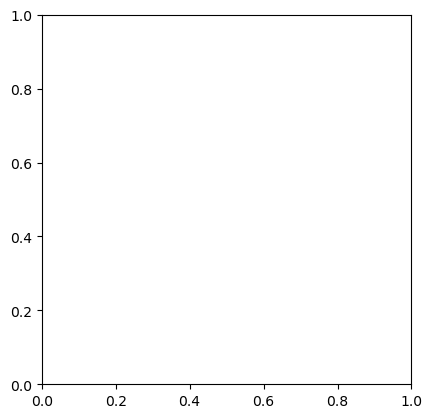

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 80
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

# fit the model using svc and also to salve the model using joblib

In [19]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"model/digit_recognizer")

ValueError: could not convert string to float: 'pixel0'

# calculate accuracy

In [ ]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ",metrics.accuracy_score(prediction,test_y))

# prediction of image drawn in paint

In [ ]:
# import warnings
# import joblib
# import cv2
# import numpy as np
# import time
# import pyscreenshot as ImageGrab

# warnings.filterwarnings("ignore", category=UserWarning)

# model = joblib.load("model/digit_recognizer")
# image_folder = "img/"

# while True:
#     im = ImageGrab.grab(bbox=(90, 250, 700, 800))  # x1, y1, x2, y2
#     im.save(image_folder + "img.png")
#     im = cv2.imread(image_folder + "img.png")
#     im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#     im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

#     ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
#     roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

#     rows, cols = roi.shape

#     x = []

#     for i in range(rows):
#         for j in range(cols):
#             k = roi[i, j]
#             if k > 100:
#                 k = 1
#             else:
#                 k = 0
#             x.append(k)
#     predictions = model.predict([x])
#     print("Prediction : ", predictions[0])
#     cv2.putText(im, "Prediction is: " + str(predictions[0]), (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

#     cv2.startWindowThread()
#     cv2.namedWindow("Result")
#     cv2.imshow("Result", im)

#     key = cv2.waitKey(1)
#     if key == 13:  # 27 is the ASCII value of esc, 13 is the ASCII value of enter
#         break

# cv2.destroyAllWindows()

